## Observations and Insights 

In [219]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")


# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [220]:
# Checking the number of mice.
mice_number = combined_df["Mouse ID"].count()
print(mice_number)


1893


In [221]:
#Finding the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [222]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = combined_df.duplicated(['Mouse ID'])
duplicate_data

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [223]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [224]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df["Mouse ID"].count()
mice_count

249

## Summary Statistics

In [225]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summary_df = round(pd.DataFrame({"Mean": mean,
                           "Median": median,
                           "Variance": variance,
                           "Standard Deviation": standard_dv,
                           "SEM": sem }), 2)
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [226]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
combined_df[["Tumor Volume (mm3)", "Drug Regimen"]].describe()




,Tumor Volume (mm3)
count,1893.000000
mean,50.448381
std,8.894722
min,22.050126
25%,45.000000
50%,48.951474
75%,56.292200
max,78.567014


## Bar and Pie Charts

Text(0, 0.5, 'Data Points')

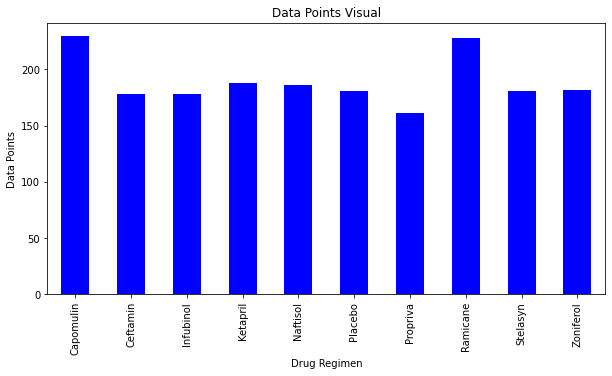

In [227]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

regimen_data = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data.plot(kind="bar", figsize=(10,5), color="b")

#set chart title

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


In [228]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.




# Show the graph that we have created


Text(0, 0.5, 'Data Points')

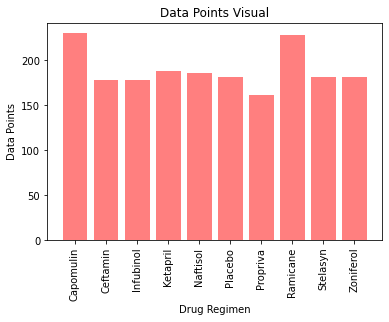

In [229]:
drug_count = (combined_df.groupby(["Drug Regimen"])["Age_months"].count())
x_axis = np.arange(len(drug_count))


plt.bar(x_axis, drug_count, color="r", alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')



#Titles and Labels
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")




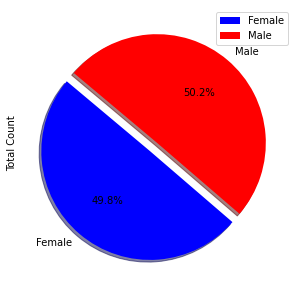

In [230]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#Creating Pie Chart
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

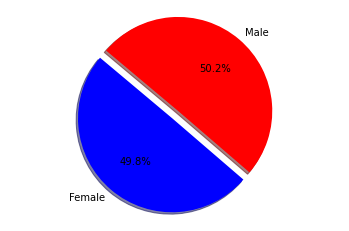

In [231]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['blue', 'red']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")



## Quartiles, Outliers and Boxplots

In [232]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
sorted_df = combined_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
greatest_df = combined_df.loc[sorted_df["Timepoint"] == 45]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(mouse_metadata, greatest_df, on='Mouse ID')
merged_df # in this data frame we have only the mice who made it to timepoint 45 

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...,...,...,...
125,y769,Ceftamin,Female,6,27,Ceftamin,Female,6,27,45,68.594745,4
126,y865,Ceftamin,Male,23,26,Ceftamin,Male,23,26,45,64.729837,3
127,z581,Infubinol,Female,24,25,Infubinol,Female,24,25,45,62.754451,3
128,z795,Naftisol,Female,13,29,Naftisol,Female,13,29,45,65.741070,3


In [233]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
for drug in drugs:
    
    drug_df = merged_df.loc[merged_df['Drug Regimen_x'] == drug]
    tumor_volume = drug_df.loc[drug_df['Timepoint'] == drug_df['Timepoint']]
    values = tumor_volume['Tumor Volume (mm3)']
    tumor_volume.append(values)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [209]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [218]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
